# 正則化(Regularization)

##### 先引入我們的packages

In [148]:
import os 
import numpy as np
import pandas as pd
import random
import math
import matplotlib.pyplot as plt

# 資料前處理

In [149]:
# 讀取檔案
file="C:\\Users\\user\\Downloads\\村里鄰戶數及人口數.xls"
# 以pandas函式庫讀取excel檔
df = pd.read_excel(file)
# 創建columns存取我們資料的項目
col=[]
# 這邊為對資料做處理，去掉不必要的資訊
for s in df.iloc[1]:
    if(s==s):
        temp=(s.replace('\u3000',''))
        col.append(temp)
col.insert(6,"人口數(女)")
col.insert(6,"人口數(男)")
col.insert(9,"成長率(女)")
col.insert(9,"成長率(男)")
col

['年別',
 '鄉鎮數',
 '村里數',
 '鄰數',
 '戶數',
 '人口數',
 '人口數(男)',
 '人口數(女)',
 '成長率',
 '成長率(男)',
 '成長率(女)',
 '戶量',
 '性比例']

In [150]:
# 將我們的資料以DataFrame的形式存取
data=pd.DataFrame(df.iloc[3:77,1:].values,columns=col)
data

,年別,鄉鎮數,村里數,鄰數,戶數,人口數,人口數(男),人口數(女),成長率,成長率(男),成長率(女),戶量,性比例
0,1946,359,6304,77917,1000952,6090860,3060527,3030333,…,…,…,6.08507,101
1,1947,359,6288,79201,1120145,6497734,3272297,3225437,66.8007,69.194,64.3837,5.8008,101.45
2,1948,359,6299,79488,1192710,6807601,3438230,3369371,47.6885,50.7084,44.6247,5.70767,102.04
3,1949,360,6306,79751,1331916,7396931,3766018,3630913,86.5694,95.3363,77.6234,5.5536,103.72
4,1950,368,6425,80619,1368654,7554399,3853799,3700600,21.2883,23.3087,19.1927,5.51958,104.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,2015,368,7851,147478,8468978,23492074,11712047,11780027,2.48876,1.20329,3.77009,2.7739,99.42
70,2016,368,7851,147373,8561383,23539816,11719270,11820546,2.03226,0.616715,3.43964,2.74953,99.14
71,2017,368,7851,147520,8649000,23571227,11719580,11851647,1.33438,0.0264522,2.6311,2.72531,98.89
72,2018,368,7760,142734,8734477,23588932,11712913,11876019,0.751128,-0.568877,2.05642,2.70067,98.63


##### 擷取我們所需要的資料，並視覺化

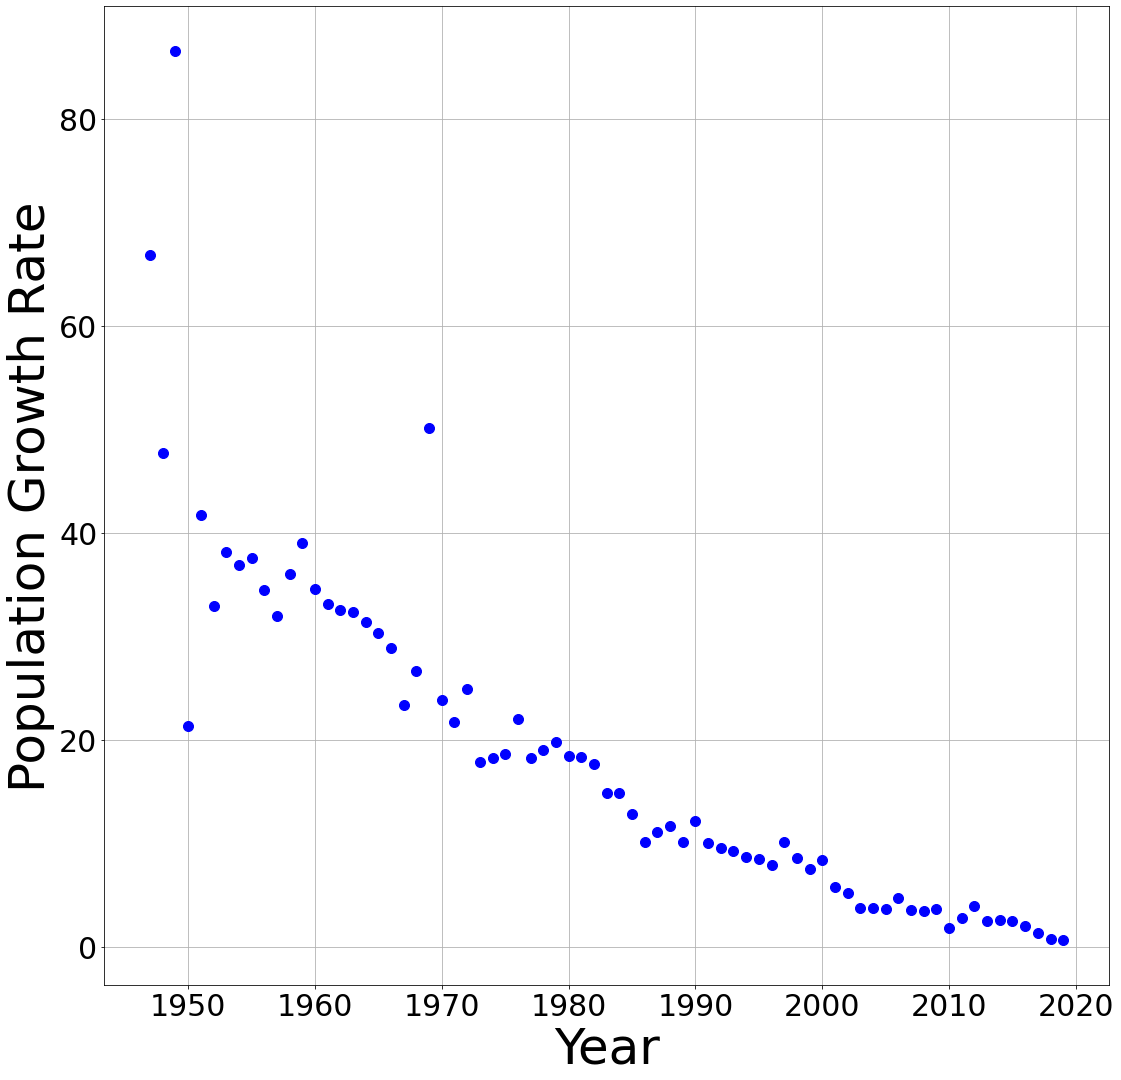

In [151]:
# year:年分 / pop:人口成長率
year=data.iloc[1:,0].values
pop=data.iloc[1:,8].values
# 視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(year,pop,"bo",markersize=10)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("Year",fontsize=50)
plt.ylabel("Population Growth Rate",fontsize=50)
plt.grid()
plt.show()

# 正規化(Normalization)

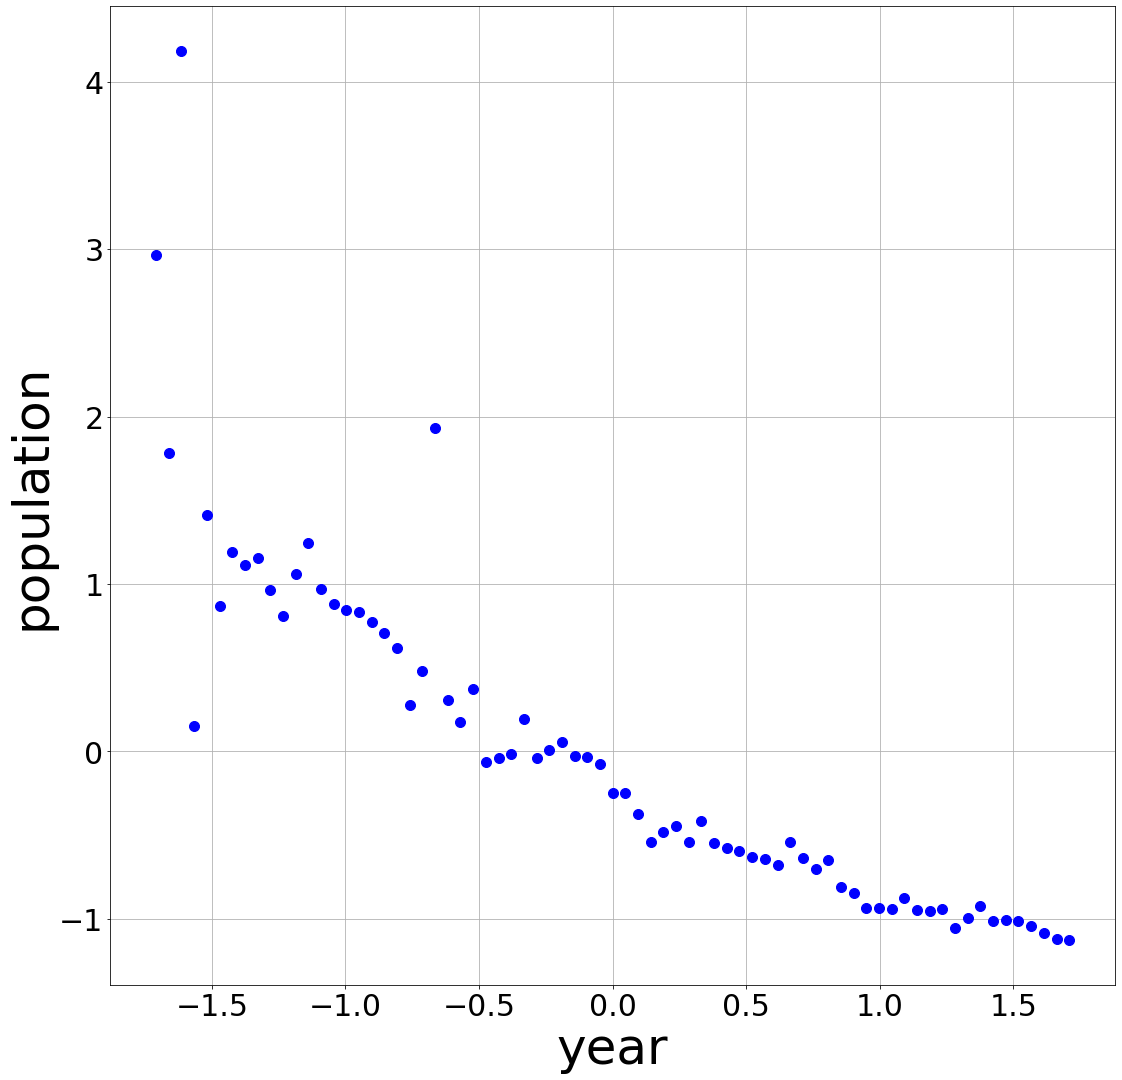

In [152]:
# 對我們的資料作正規化
nor_year=pd.DataFrame((year-np.mean(year))/np.std(year),columns=["nor_year"])
nor_pop=pd.DataFrame((pop-np.mean(pop))/np.std(pop),columns=["nor_pop"])
nor_data=pd.concat([nor_year, nor_pop], axis=1)
# 一樣將之視覺化
plt.rcParams["figure.figsize"] = (18,18)
plt.plot(nor_year,nor_pop,"bo",markersize=10)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel("year",fontsize=50)
plt.ylabel("population",fontsize=50)
plt.grid()
plt.show()

# 測試集和訓練集

In [153]:
# 將我們的資料以0.8:0.2的比例，分訓練集和測試集
sample = np.random.rand(len(nor_data)) <= 0.8
train = nor_data[sample]
test = nor_data[~sample]
train_x,train_y=train.iloc[:,0].values,train.iloc[:,1].values
test_x,test_y=test.iloc[:,0].values,test.iloc[:,1].values
print("the len of the training set: "+str(len(train)))
print("the len of the testing set: "+str(len(test)))

the len of the training set: 56
the len of the testing set: 17


# 一般梯度下降演算法

In [154]:
def refresh(X,y,w,a):
    # 這裡可以比照公式
    dJ=(X.dot(w.T)-y).dot(X)/len(y)
    # 更新權重
    new_w=w-a*dJ
    return new_w

# L1 norm regularization

In [155]:
def Lasso(X,y,w,a,lambda1):
    # 這裡一樣
    dJ=(X.dot(w.T)-y).dot(X)/len(y)
    # 加入L1正則化
    L1=(lambda1/2/len(y))*np.sign(w)
    # 更新權重
    new_w=w-a*(dJ+L1)
    return new_w

# L2 norm regularization

In [156]:
def Ridge(X,y,w,a,lambda2):
    # 這裡一樣
    dJ=(X.dot(w.T)-y).dot(X)/len(y)
    # 加入L2正則化
    L2=(lambda2/len(y))*w
    # 更新權重
    new_w=w-a*(dJ+L2)
    return new_w

# Polynomial_regression

In [157]:
def Polynomial_regression(s,a,train_x,train_y,test_x,test_y,p,mode):
    # s：s次方特徵轉換
    # a：學習速度參數
    # X：資料矩陣
    # w：權重
    # T：更新次數
    # lambda1：L1正則化參數
    # lambda2：L2正則化參數
    lambda1,lambda2=0.6,0.3
    n=s+1
    train_X=np.zeros((len(train_x),n))
    # 產生我們的資料矩陣
    for i in range(0,n):
        train_X[:,i]=train_x**i
    # 初始化我們的權重
    w=(np.linalg.inv((train_X.T).dot(train_X)).dot(train_X.T)).dot(train_y)
    # 計算當前model所對應的y值
    comp_y=train_X.dot(w.T)
    # 計算我們的訓練集錯誤率
    error=0
    for k in range(0,len(train_y)):
        error+=abs(comp_y[k]-train_y[k])
    temp_error=error/len(train_y)
    # 這次我們改用while迴圈跑
    # 每跑1000次，檢查當前model錯誤率
    # 如果上一次的錯誤率-這一次的錯誤率<0.00001
    # 則跳出迴圈
    dis=1
    while (dis>0.00001):
        T=1000
        for t in range(0,T):
            # 有3個mode可以選鑿
            # 1:Lasso regression 
            # 2:Ridge regression
            # 其他：無regularization
            if(mode==1):
                w=Lasso(train_X,train_y,w,a,lambda1)
            elif(mode==2):
                w=Ridge(train_X,train_y,w,a,lambda2)
            else:
                w=refresh(train_X,train_y,w,a)
        # 計算1000次迴圈後的錯誤率
        comp_y=train_X.dot(w.T)
        error=0
        for k in range(0,len(train_y)):
            error+=abs(comp_y[k]-train_y[k])
        error=error/len(train_y)
        # 相減看看差別有沒有小於0.00001
        dis=abs(error-temp_error)
        temp_error=error
    
    # 產生我們測試集的資料矩陣
    test_X=np.zeros((len(test_x),n))
    for i in range(0,n):
        test_X[:,i]=test_x**i
    # 計算model在測試集的錯誤率
    pred_error=0
    pred_y=test_X.dot(w.T)
    for k in range(0,len(pred_y)):
        pred_error+=abs(pred_y[k]-test_y[k])
    pred_error=pred_error/len(test_y)
    # 把結果輸出
    print(s,"次方轉換: ","Trainging error = ", error,"/","Testing error = ", pred_error)
    # 如果p=1，就繪圖
    if(p==1):
        plot_x=np.linspace(-2,2,300)
        plot_X=np.zeros((len(plot_x),n))
        for i in range(0,n):
            plot_X[:,i]=plot_x**i
        plot_y=plot_X.dot(w.T)
        plt.rcParams["figure.figsize"] = (18,18)
        plt.plot(plot_x,plot_y,"g-",linewidth=6,label="fitting")
        plt.plot(train_x,train_y,"bo",markersize=10,label="trainging data")
        plt.plot(test_x,test_y,"ro",markersize=10,label="testing data")
        plt.xticks(fontsize=30)
        plt.yticks(fontsize=30)
        plt.legend(loc="upper right",fontsize=30)
        plt.title(str(n-1)+" power",fontsize=50)
        plt.grid()
        plt.xlim([-1.8,1.8])
        plt.ylim([-1.5,4.5])
        plt.show()
    # 回傳錯誤率
    return error,pred_error

# 線性回歸

1 次方轉換:  Trainging error =  0.2924162545028034 / Testing error =  0.2371611506242879


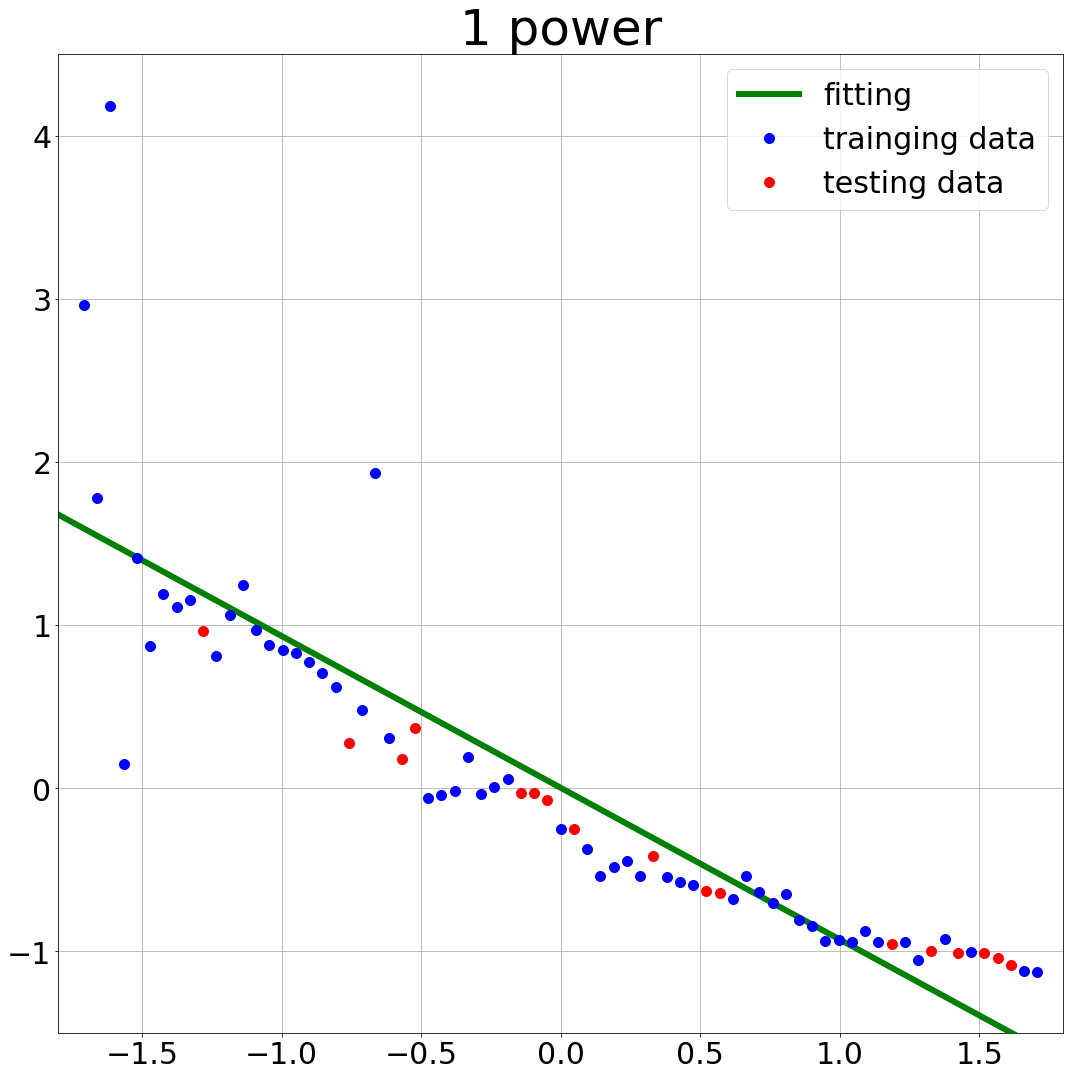

In [158]:
errory_train,errory_test=Polynomial_regression(1,1,train_x,train_y,test_x,test_y,1,0)

# 2次特徵轉換

2 次方轉換:  Trainging error =  0.21403668990416214 / Testing error =  0.09067778580215918


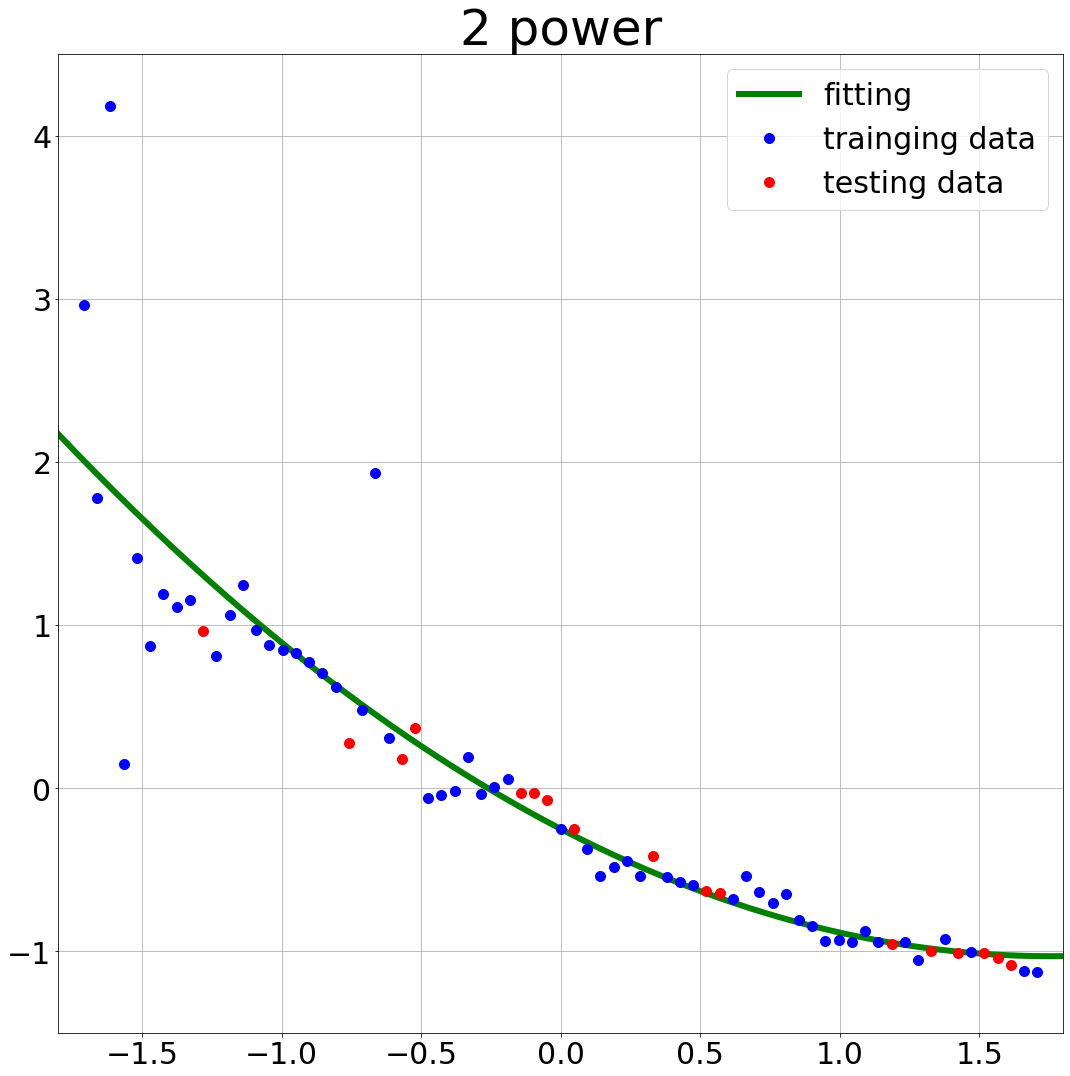

In [159]:
errory_train,errory_test=Polynomial_regression(2,0.5,train_x,train_y,test_x,test_y,1,0)

# 3次特徵轉換

3 次方轉換:  Trainging error =  0.2156088759740317 / Testing error =  0.09206696062210101


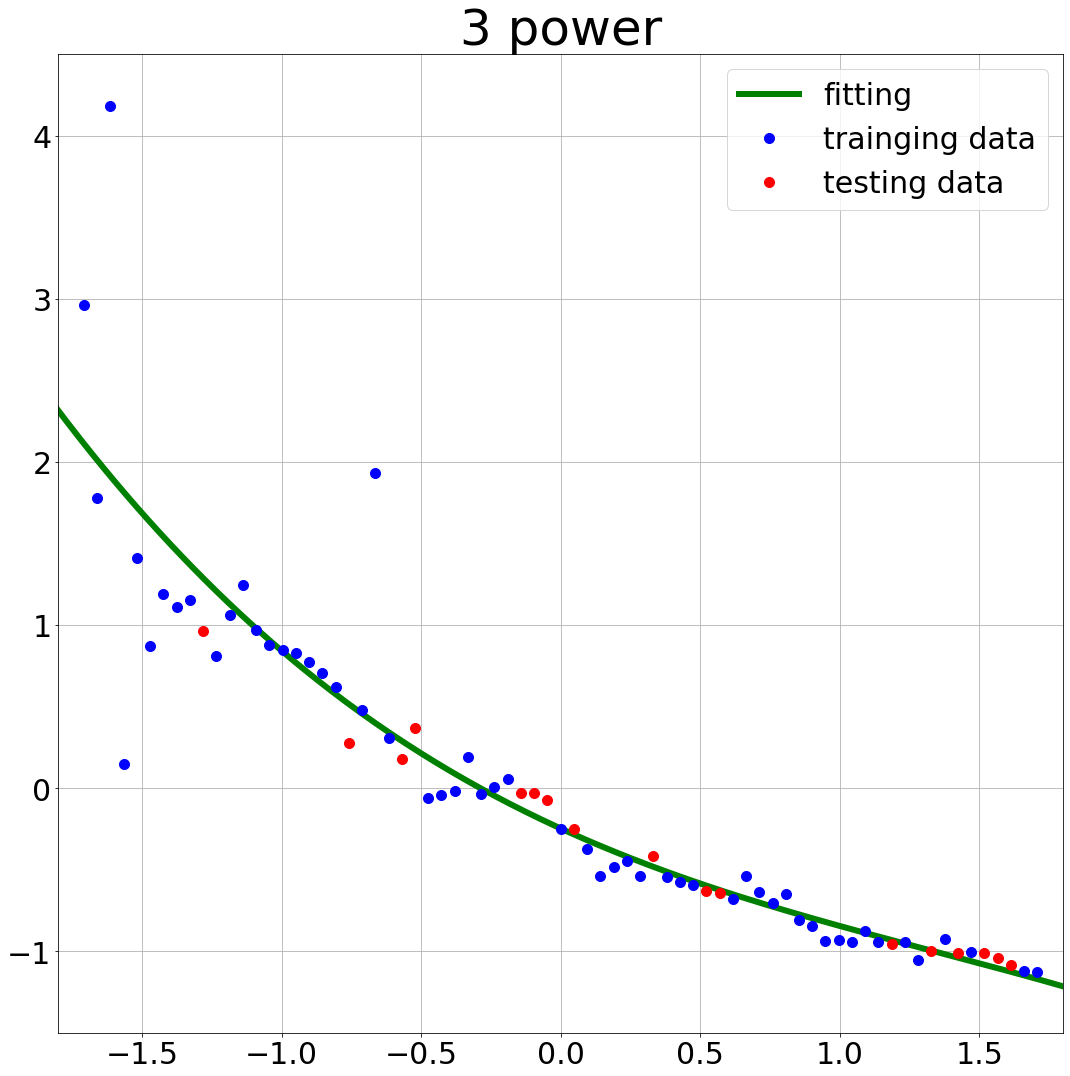

In [160]:
errory_train,errory_test=Polynomial_regression(3,0.3,train_x,train_y,test_x,test_y,1,0)

# 4次特徵轉換

4 次方轉換:  Trainging error =  0.22980504112658223 / Testing error =  0.07366806157840221


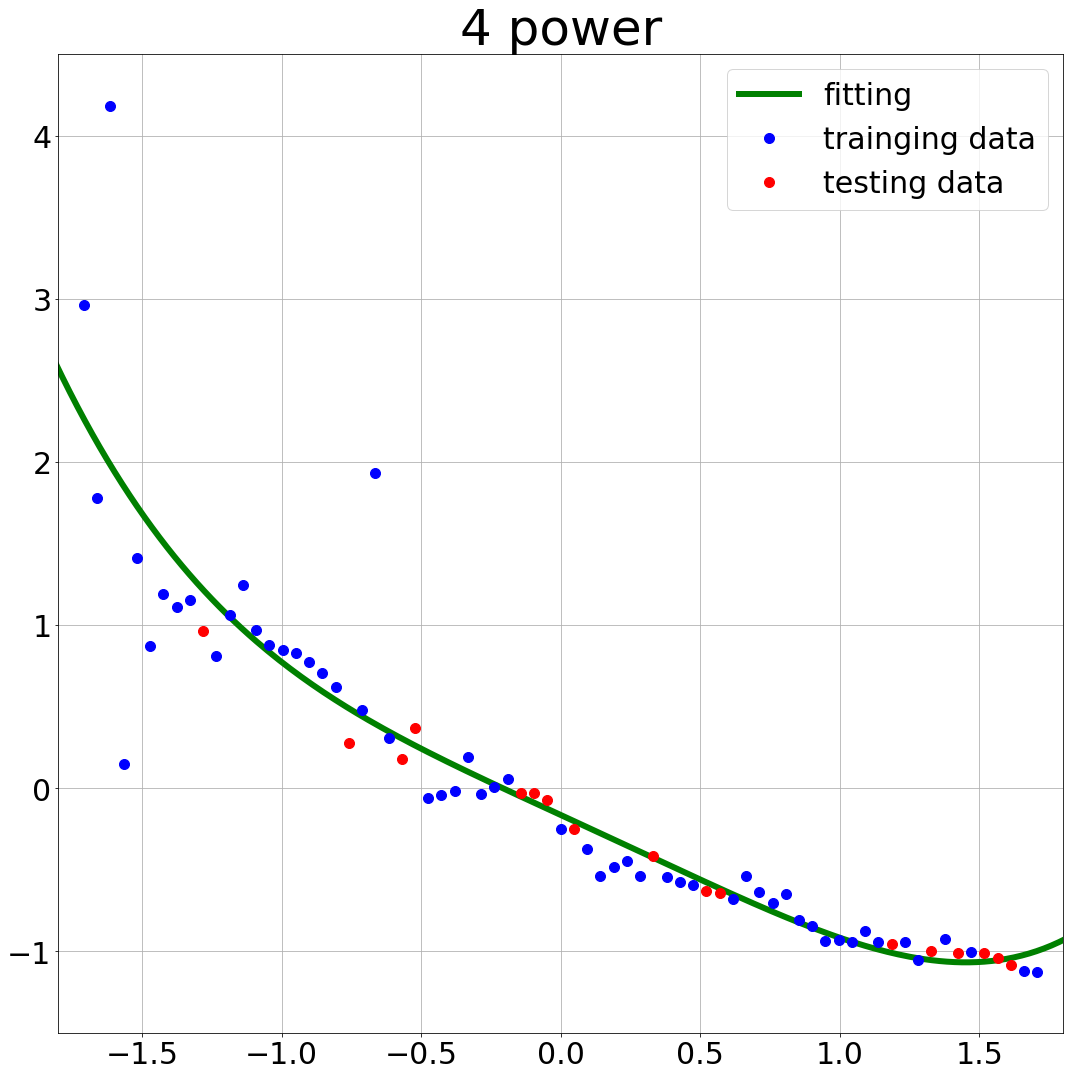

In [161]:
errory_train,errory_test=Polynomial_regression(4,0.1,train_x,train_y,test_x,test_y,1,0)

# 5次特徵轉換

5 次方轉換:  Trainging error =  0.23155539953344714 / Testing error =  0.0979303128524308


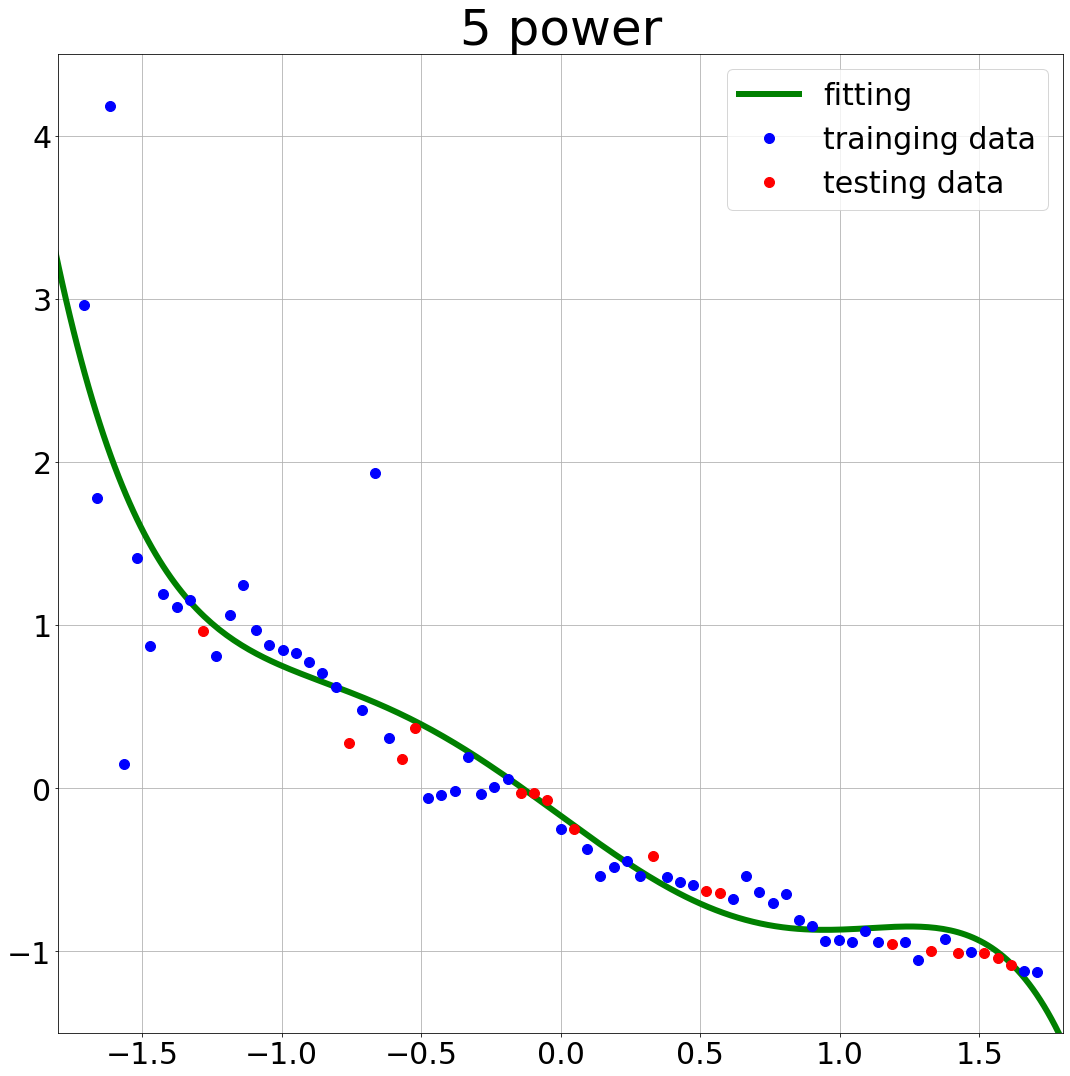

In [162]:
errory_train,errory_test=Polynomial_regression(5,0.06,train_x,train_y,test_x,test_y,1,0)

# 6次特徵轉換

6 次方轉換:  Trainging error =  0.20577970816498836 / Testing error =  0.14660605879660144


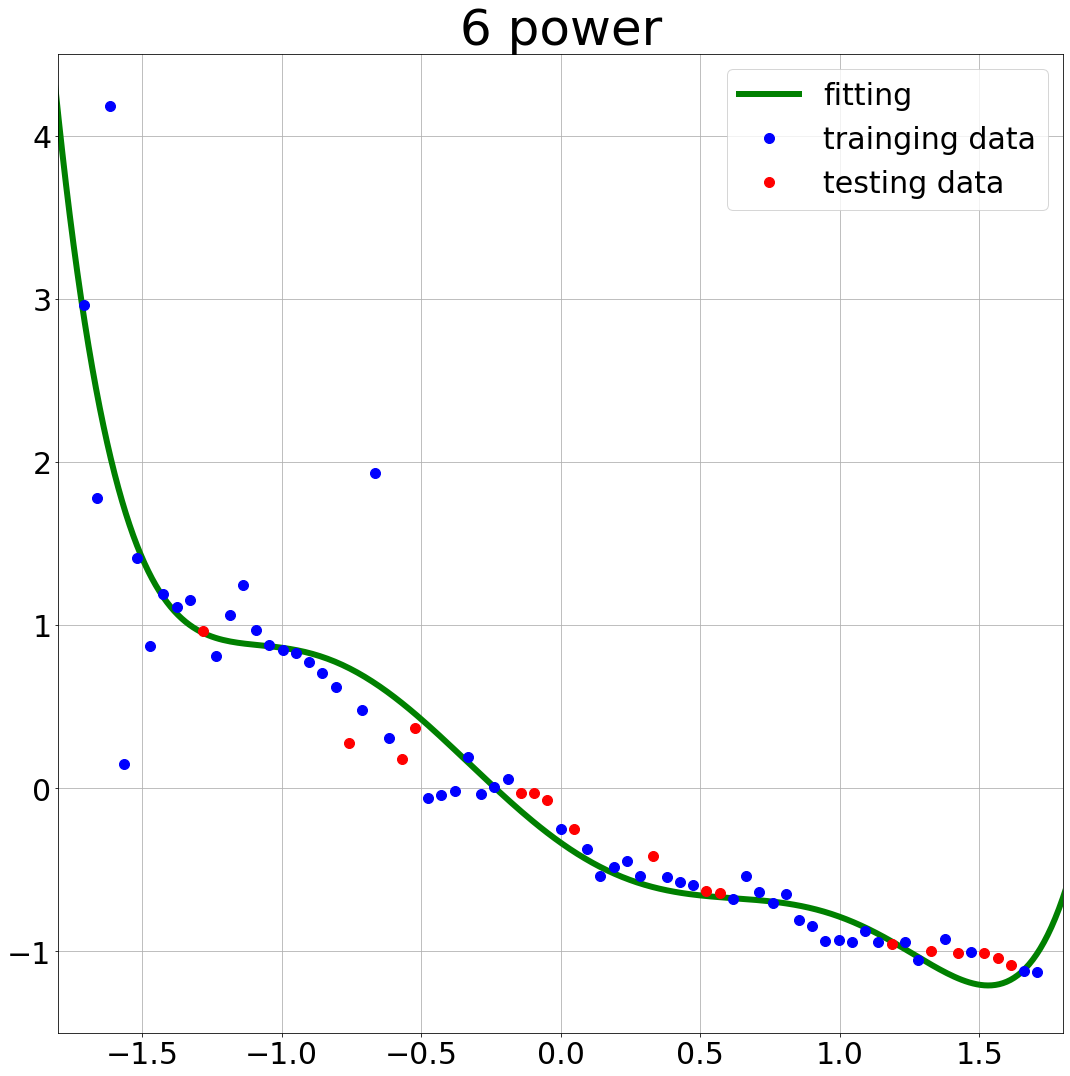

In [163]:
errory_train,errory_test=Polynomial_regression(6,0.02,train_x,train_y,test_x,test_y,1,0)

# 6次特徵轉換 Lasso Regression

6 次方轉換:  Trainging error =  0.21839017256218868 / Testing error =  0.06602420012341251


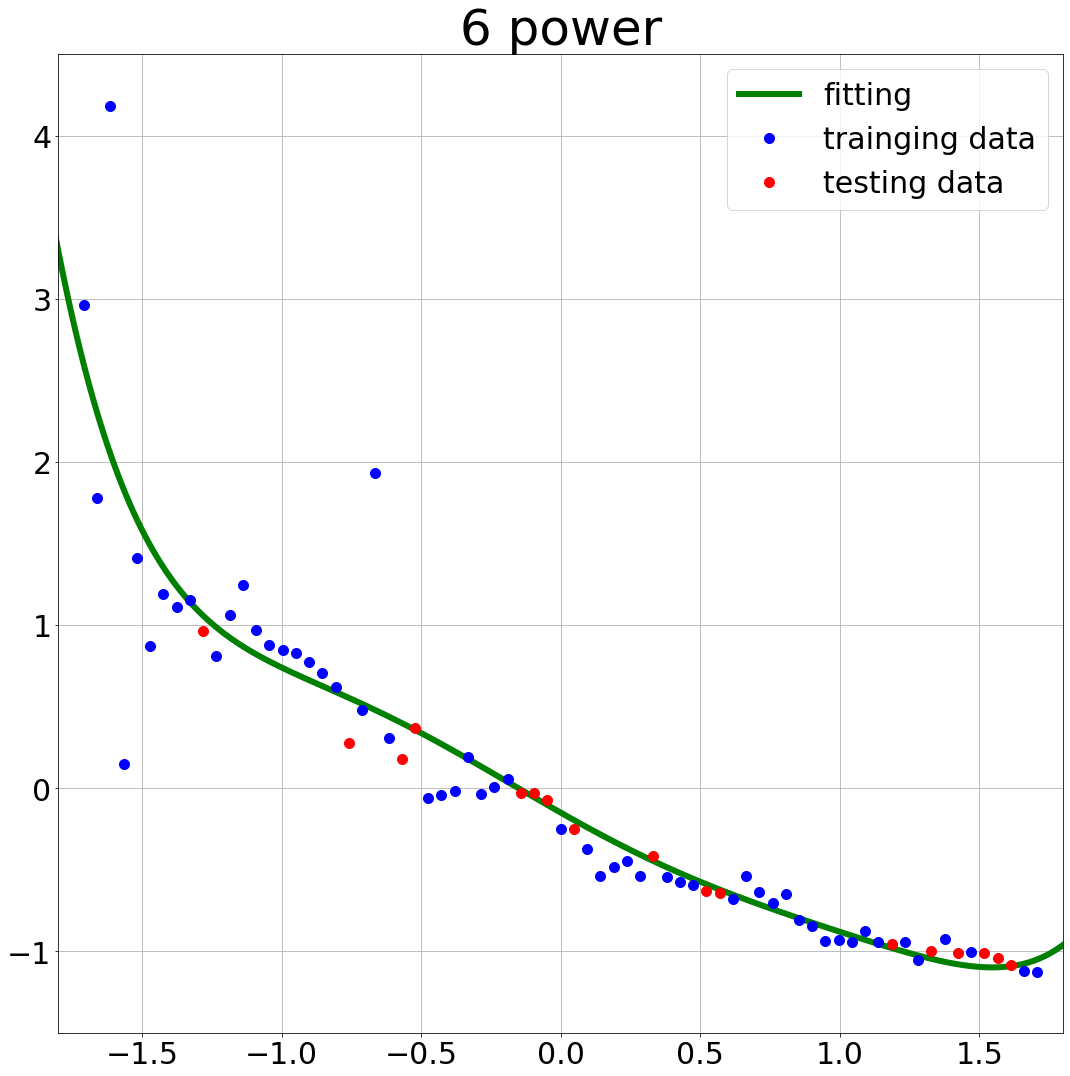

In [164]:
errory_train,errory_test=Polynomial_regression(6,0.02,train_x,train_y,test_x,test_y,1,1)

# 6次特徵轉換 Ridge Regression

6 次方轉換:  Trainging error =  0.19638081399923665 / Testing error =  0.11287466423688013


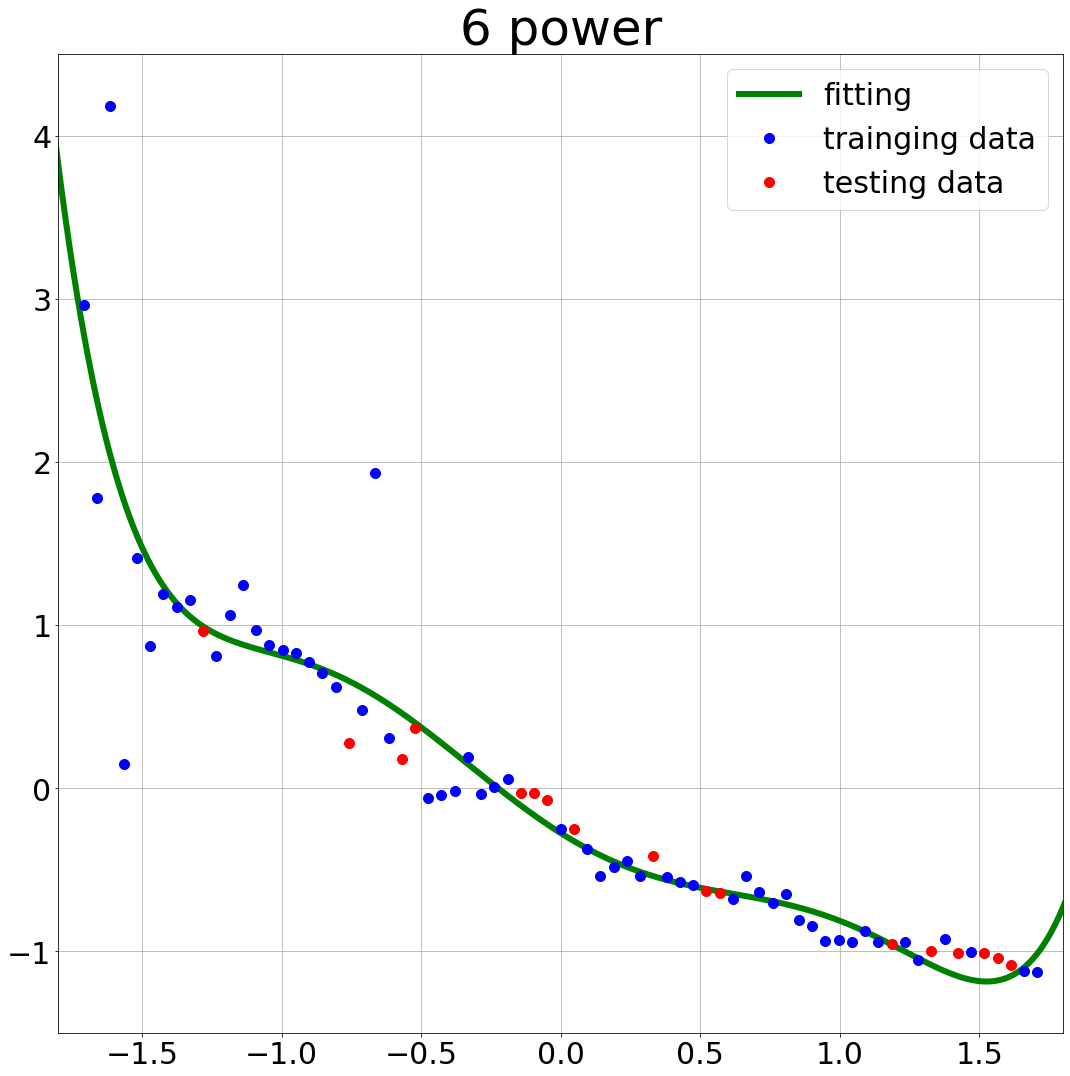

In [165]:
errory_train,errory_test=Polynomial_regression(6,0.02,train_x,train_y,test_x,test_y,1,2)